In [24]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [52]:
%matplotlib notebook

In [622]:
data = np.loadtxt('data/sample_vel_x_vel_y_2.csv', delimiter=',')
vel_x = data[:,0]
vel_y = data[:,1]

In [261]:
inc_x = 0.1
inc_y = 0.1
op_x = np.arange(-1,1+inc_x,inc_x)
op_y = np.arange(-1,1+inc_y, inc_y)
t_int = 0.12
delta_t = 1
dt = 40

In [262]:
def drift_x(vel_x, dt, t_int):
    return np.array([b-a for a,b in zip(vel_x, vel_x[dt:])])/(t_int*dt)

In [263]:
def drift_y(vel_y, dt, t_int):
    return np.array([b-a for a,b in zip(vel_y, vel_y[dt:])])/(t_int*dt)

In [264]:
def diffusion_x(vel_x, delta_t, t_int):
    return np.square(np.array([b-a for a, b in zip(vel_x, vel_x[delta_t:])]))/(t_int*delta_t)

In [265]:
def diffusion_y(vel_y, delta_t, t_int):
    return np.square(np.array([b-a for a, b in zip(vel_y, vel_y[delta_t:])]))/(t_int*delta_t)

In [266]:
def diffusion_xy(vel_x, vel_y, t_int, delta_t):
        return np.array([(b-a)*(d-c) for a,b,c,d in zip(vel_x,vel_x[delta_t:], vel_y, vel_y[delta_t:])])/(delta_t*t_int)

In [514]:
def vector_drift_diff(vel_x, vel_y, op_x, op_y, dt=40, delta_t=1, t_int=0.12):
    driftX = drift_x(vel_x, dt, t_int)
    driftY = drift_y(vel_y, dt, t_int)
    diffusionX = diffusion_x(vel_x, delta_t, t_int)
    diffusionY = diffusion_y(vel_y, delta_t, t_int)
    diffusionXY = diffusion_xy(vel_x, vel_y, t_int, delta_t)
    
    avgDriftX = np.zeros((len(op_x), len(op_y)))
    avgDriftY = np.zeros((len(op_x), len(op_y)))
    avgDiffX = np.zeros((len(op_x), len(op_y)))
    avgDiffY = np.zeros((len(op_x), len(op_y)))
    avgDiffXY = np.zeros((len(op_x), len(op_y)))
    m = 0
    vel_x_, vel_y_ = vel_x[0:-dt], vel_y[0:-dt]
    for bin_x in op_x:
        n = 0
        for bin_y in op_y:
            i = np.where(np.logical_and(np.logical_and(vel_x_<(bin_x+inc_x), vel_x_>=bin_x), np.logical_and(vel_y_<(bin_y+inc_y), vel_y_>=bin_y)))[0]
            #if not len(i): continue
            avgDriftY[n,m] = np.nanmean(driftY[i])
            avgDiffY[n,m] = np.nanmean(diffusionY[i])
            avgDiffXY[n,m] = np.nanmean(diffusionXY[i])
            
            avgDriftX[n,m] = np.nanmean(driftX[i])
            avgDiffX[n,m] = np.nanmean(diffusionX[i])
            n = n + 1
        m = m + 1
    return avgDriftX, avgDriftY, avgDiffX, avgDiffY, avgDiffXY

In [515]:
for i in range(len(op_x)):
    bin_x = op_x[i]
    bin_y = op_y[i]
    np.where(np.logical_and(np.logical_and(vel_x<(bin_x+inc_x), vel_x>=bin_x), np.logical_and(vel_y<(bin_y+inc_y), vel_y>=bin_y)))

In [516]:
avgdriftX, avgdriftY, avgdiffX, avgdiffY, avgdiffXY = vector_drift_diff(vel_x, vel_y, op_x, op_y, dt=40, delta_t=1, t_int=0.12)
len(avgdriftX), len(avgdriftY), len(avgdiffX), len(avgdiffY), len(avgdiffXY)

/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/home/ashwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


(21, 21, 21, 21, 21)

In [472]:
m_avgdriftX = np.loadtxt('data/avgdriftX.csv', delimiter=',')
m_avgdriftY = np.loadtxt('data/avgdriftY.csv', delimiter=',')
m_avgdiffX = np.loadtxt('data/avgdiffX.csv', delimiter=',')
m_avgdiffY = np.loadtxt('data/avgdiffY.csv', delimiter=',')
m_avgdiffXY = np.loadtxt('data/avgdiffXY.csv', delimiter=',')

In [473]:
np.allclose(avgdriftX,m_avgdriftX, equal_nan=True, atol=5e-1)

True

In [474]:
np.allclose(avgdriftY,m_avgdriftY, equal_nan=True, atol=5e-1)

True

In [475]:
np.allclose(avgdiffX,m_avgdiffX, equal_nan=True, atol=5e-1)

True

In [476]:
np.allclose(avgdiffY,m_avgdiffY, equal_nan=True, atol=5e-1)

True

In [477]:
np.allclose(avgdiffXY,m_avgdiffXY, equal_nan=True, atol=5e-1)

False

In [478]:
avgdiffXY[np.where(np.isnan(avgdiffXY))] = 0
np.testing.assert_array_equal(avgdiffXY,m_avgdiffXY)

AssertionError: 
Arrays are not equal

Mismatch: 78.2%
Max absolute difference: 0.00696668
Max relative difference: 6.45960479
 x: array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00, -7.330472e-03, -8.950619e-03, -7.256456e-03,
         9.520890e-04, -5.200472e-03, -6.173140e-03,  4.992017e-03,...
 y: array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -7.3304e-03, -8.9508e-03, -7.2568e-03,  9.4179e-04, -5.2188e-03,
        -6.1734e-03,  4.9921e-03, -8.2488e-04,  3.8595e-03,  1.0567e-02,...

In [ ]:
np.allclose(avgdiffXY,m_avgdiffXY, equal_nan=True, atol=5e-1)

In [ ]:
def nan_helper(x):
    return np.isnan(x), lambda z: z.nonzero()[0]

def interpolate_nan(y):
    nans, x = nan_helper(y)
    y[nans] = np.interp(x(nans), x(~nans), y[~nans])
    return y

In [616]:
def histogram3d(x,bins = 10, normed = False, color = 'blue', alpha = 1, hold = False, plot_hist=False):
    """
    Plotting a 3D histogram

    Parameters
    ----------

    sample : array_like.		
        The data to be histogrammed. It must be an (N,2) array or data 
        that can be converted to such. The rows of the resulting array 
        are the coordinates of points in a 2 dimensional polytope.

    bins : sequence or int, optional, default: 10.
        The bin specification:

        * A sequence of arrays describing the bin edges along each dimension.
        * The number of bins for each dimension (bins =[binx,biny])
        * The number of bins for all dimensions (bins = bins).

    normed : bool, optional, default: False.
        If False, returns the number of samples in each bin. 
        If True, returns the bin density bin_count / sample_count / bin_volume.

    color: string, matplotlib color arg, default = 'blue'

    alpha: float, optional, default: 1.
        0.0 transparent through 1.0 opaque

    hold: boolean, optional, default: False

    Returns   
    --------
    H : ndarray.
        The bidimensional histogram of sample x.

    edges : list.
        A list of 2 arrays describing the bin edges for each dimension.

    See Also 
    --------
    histogram: 1-D histogram
    histogram2d: 2-D histogram
    histogramdd: N-D histogram

    Examples
    --------
    >>> r = np.random.randn(1000,2)
    >>> H, edges = np.histogram3d(r,bins=[10,15])
    """

    if np.size(bins) == 1:
        bins = [bins,bins]

    if(len(x) == 2):
        x = x.T;


    H, edges = np.histogramdd(x, bins, normed = normed)

    H = H.T
    X = np.array(list(np.linspace(min(edges[0]),max(edges[0]),bins[0]))*bins[1])   
    Y = np.sort(list(np.linspace(min(edges[1]),max(edges[1]),bins[1]))*bins[0])    

    dz = np.array([]);

    for i in range(bins[1]):
        for j in range(bins[0]):
            dz = np.append(dz, H[i][j])

    Z = np.zeros(bins[0]*bins[1])

    dx = X[1] - X[0]   
    dy = Y[bins[0]] - Y[0]

    if plot_hist:
        if (not hold):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            colors = plt.cm.jet(dz.flatten()/float(dz.max()))
            ax.bar3d(X,Y,Z,dx,dy,dz, alpha = alpha, color = colors);
        else:
            try:
                ax = plt.gca();
                colors = plt.cm.jet(dz.flatten()/float(dz.max()))
                ax.bar3d(X,Y,Z,dx,dy,dz, alpha = alpha, color = colors);
            except:
                plt.close(plt.get_fignums()[-1])
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                colors = plt.cm.jet(dz.flatten()/float(dz.max()))
                ax.bar3d(X,Y,Z,dx,dy,dz, alpha = alpha, color = colors);


        plt.xlabel('X');
        plt.ylabel('Y');
    edges = [X,Y];
    H = dz.reshape(bins[0],bins[1]);

    return H, edges, X, Y, Z, dx, dy, dz

<IPython.core.display.Javascript object>


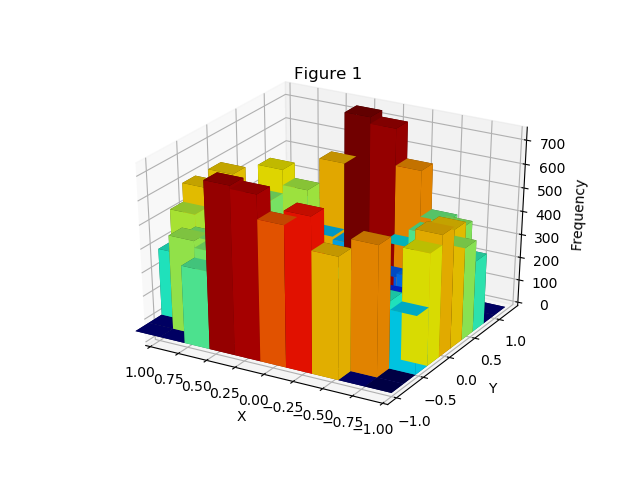

Text(0.5, 0.92, 'Figure 1')

In [637]:
vel_x = interpolate_nan(vel_x)
vel_y = interpolate_nan(vel_y)
H, edges, X, Y, Z, dx, dy, dz = histogram3d(np.array([vel_x[~np.isnan(vel_x)], vel_y[~np.isnan(vel_y)]]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.jet(dz.flatten()/float(dz.max()))
ax.bar3d(X,Y,Z,dx,dy,dz, alpha=1, color=colors)
plt.xlim([1,-1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Frequency')
plt.title('Figure 1')

<IPython.core.display.Javascript object>


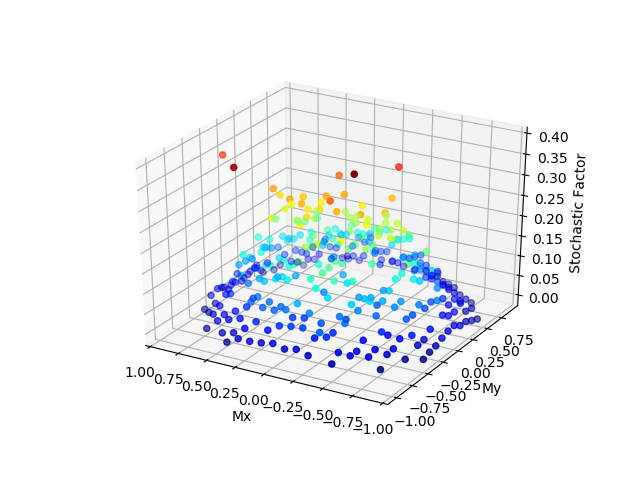

(1, -1)

In [499]:
x = np.matlib.repmat(op_x,len(op_x),1)
x.ravel().sort()
y = np.matlib.repmat(op_y, len(op_y),1)
avgdiffY[avgdiffY==0] = np.nan

plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, avgdiffY.ravel(), c=avgdiffY.ravel(), cmap='jet');

ax.set_xlabel('Mx')
ax.set_ylabel('My')
ax.set_zlabel('Stochastic Factor')
plt.xlim([1,-1])

<IPython.core.display.Javascript object>


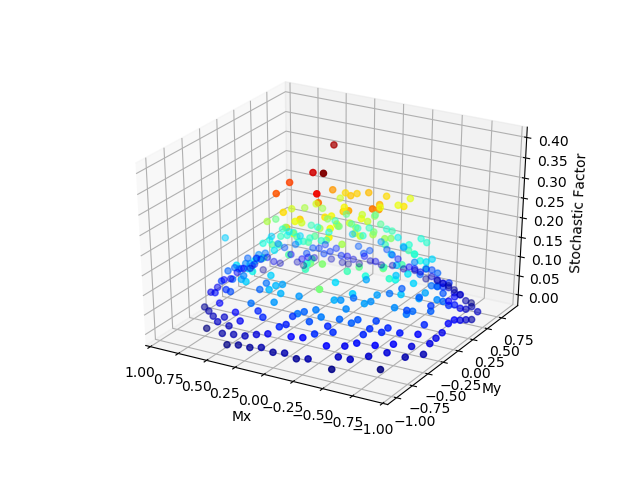

(1, -1)

In [495]:
x = np.matlib.repmat(op_x,len(op_x),1)
x.ravel().sort()
y = np.matlib.repmat(op_y, len(op_y),1)
#y.ravel().sort()
avgdiffX[avgdiffX==0] = np.nan

plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, avgdiffX.ravel(), c=avgdiffX.ravel(), cmap='jet');

ax.set_xlabel('Mx')
ax.set_ylabel('My')
ax.set_zlabel('Stochastic Factor')
plt.xlim([1,-1])

<IPython.core.display.Javascript object>


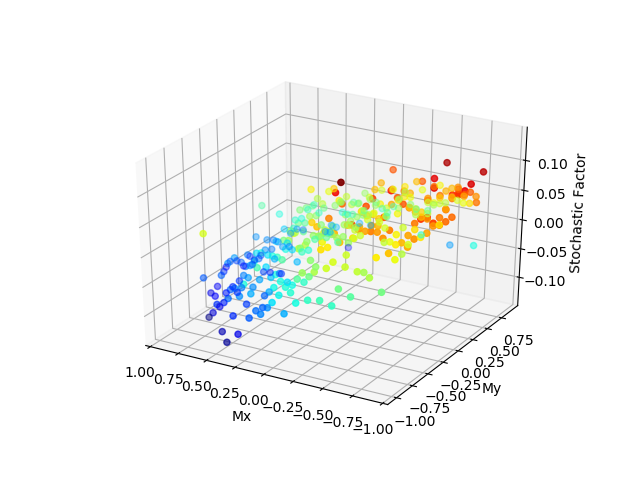

(1, -1)

In [506]:
x = np.matlib.repmat(op_x,len(op_x),1)
x.ravel().sort()
y = np.matlib.repmat(op_y, len(op_y),1)
#y.ravel().sort()
avgdriftY[avgdriftY==0] = np.nan

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, avgdriftY.ravel(), c=avgdriftY.ravel(), cmap='jet');

ax.set_xlabel('Mx')
ax.set_ylabel('My')
ax.set_zlabel('Stochastic Factor')
plt.xlim([1,-1])

<IPython.core.display.Javascript object>


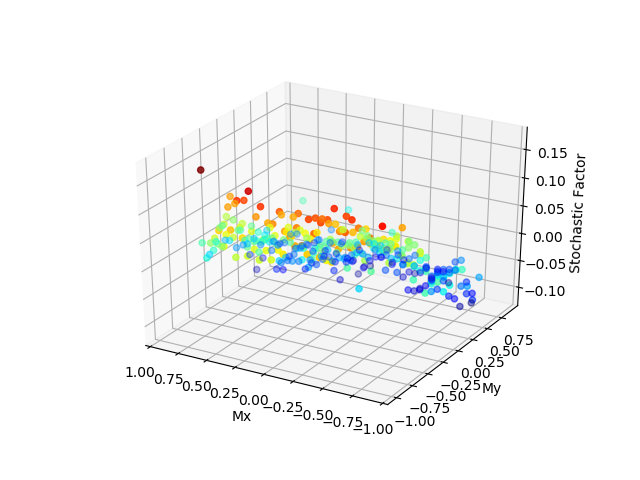

(1, -1)

In [606]:
x = np.matlib.repmat(op_x,len(op_x),1)
x.ravel().sort()
y = np.matlib.repmat(op_y, len(op_y),1)
#y.ravel().sort()
avgdriftX[avgdriftX==0] = np.nan

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, avgdriftX.ravel(), c=avgdriftX.ravel(), cmap='jet');

ax.set_xlabel('Mx')
ax.set_ylabel('My')
ax.set_zlabel('Stochastic Factor')
plt.xlim([1,-1])

In [577]:
class Error(Exception):
    """Base class for exceptions in this module."""
    pass
class InputError(Error):
    """Exception raised for errors in the input.

    Attributes:
        expression -- input expression in which the error occurred
        message -- explanation of the error
    """

    def __init__(self, expression, message, j = 2):
        if not 'j' in locals():
            self.j = 1
            print('No j')
        self.expression = expression
        self.message = message

In [578]:
ipe = InputError('data', 'message')
ipe.j

AttributeError: 'InputError' object has no attribute 'j'

In [522]:
vel_x, vel_y

(array([0.78161 , 0.09235 , 0.34344 , ..., 0.057831, 0.021836, 0.049725]),
 array([ 0.59627, -0.19336, -0.42678, ...,  0.97344,  0.98163,  0.98163]))

In [524]:
np.sqrt((np.square(vel_x) + np.square(vel_y)))

array([0.98308296, 0.21428162, 0.54780672, ..., 0.97515632, 0.98187284,
       0.98288862])

In [600]:
class ClassA:
    def __init__(self):
        self.var1 = 123
        self.var2 = 456
    def output(self):
        return ClassB(self)
class ClassC:
    def __init__(self):
        pass

In [601]:
class ClassB(ClassC):
    def __init__(self, class_a):
        self.var1 = class_a.var1
        self.var2 = class_a.var2
        print(self.var1, self.var2)

In [602]:
cls_a = ClassA()

In [603]:
cls_a.output()

123 456


In [604]:
cls_a.__dict__

{'var1': 123, 'var2': 456}